<a href="https://colab.research.google.com/github/yuji-matsunami/kaggle_cifar-10/blob/main/kaggle_cifar_10_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow

tensorflow.test.gpu_device_name()

'/device:GPU:0'

In [2]:
!cp /content/drive/MyDrive/データサイエンス/cifar-10.zip .
!unzip /content/cifar-10.zip

Archive:  /content/cifar-10.zip
  inflating: sampleSubmission.csv    
  inflating: test.7z                 
  inflating: train.7z                
  inflating: trainLabels.csv         


In [3]:
!7z x /content/train.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 109723070 bytes (105 MiB)

Extracting archive: /content/train.7z
--
Path = /content/train.7z
Type = 7z
Physical Size = 109723070
Headers Size = 294768
Method = LZMA:26
Solid = +
Blocks = 1

  0%      2% - train/1.png                    2% 1093 - train/10982.png                             2% 1586 - train/11425.png                             4% 1868 - train/1168.png                            6% 1895 - train/11703.png                           

In [4]:
TRAIN_BASE_DIR = "content/train"
CATEGORYS = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(len(CATEGORYS))

10


In [5]:
from tensorflow.keras.preprocessing.image import  load_img,img_to_array,array_to_img
from glob import glob
import csv
from natsort import natsorted
file_dir="/content/train"
train_img = []
train_label = []
files = glob(file_dir + "/*.png")

csv_file = open("/content/trainLabels.csv", "r", encoding="utf_8", errors="", newline="")
label_read = csv.reader(csv_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
label_list = []
for row in label_read:
    label_list.append(row)

print(label_list[1])
i = 0
for file_name in natsorted(files):
    # print(file_name)
    img = load_img(file_name,color_mode="rgb", target_size=(32,32))
    array = img_to_array(img)
    train_img.append(array)
    categorys_num = CATEGORYS.index(label_list[i+1][1])
    train_label.append(categorys_num)
    i += 1

print(train_label[0])



['1', 'frog']
6


frog


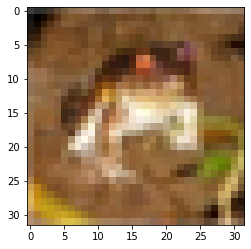

truck


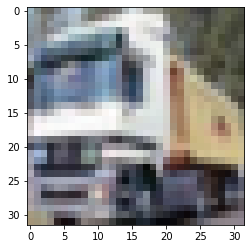

truck


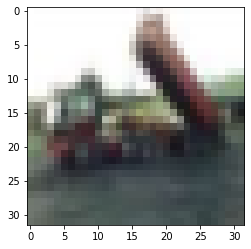

deer


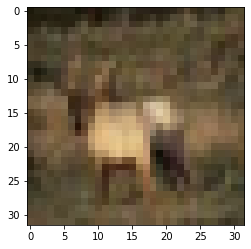

automobile


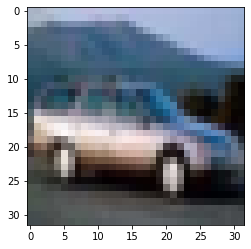

automobile


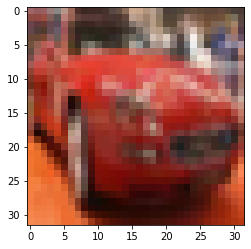

bird


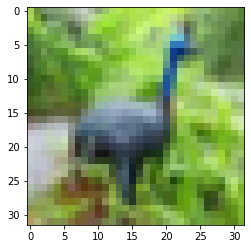

horse


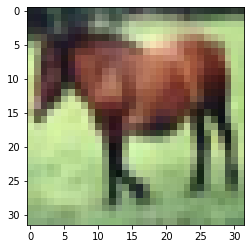

ship


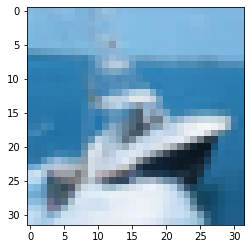

cat


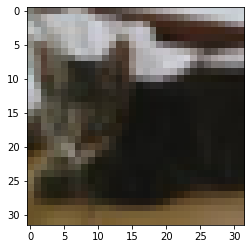

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
train_img = np.array(train_img)
train_label = np.array(train_label)
train_img = train_img.astype('float32') / 255
train_label = to_categorical(train_label,10)
"""
print(type(train_img[0]))
print(train_img[0])
np_img = train_img[0]
plt.imshow(np_img)
plt.show()
"""
for i in range(len(train_img)):
    plt.imshow(train_img[i])
    print(CATEGORYS[np.argmax(train_label[i])])
    plt.show()
    if i == 9:
        break

In [19]:
from tensorflow.keras.datasets import cifar10

(a,b), (val_img, val_label) = cifar10.load_data()
val_img = val_img.astype("float32")/255
val_label = to_categorical(val_label, 10)

[[[0.1882353  0.19215687 0.1882353 ]
  [0.25490198 0.26666668 0.2627451 ]
  [0.32941177 0.34901962 0.34117648]
  ...
  [0.23921569 0.24705882 0.23137255]
  [0.19215687 0.19607843 0.18039216]
  [0.1764706  0.1764706  0.16470589]]

 [[0.05490196 0.05098039 0.05098039]
  [0.0627451  0.05882353 0.05098039]
  [0.07450981 0.07450981 0.05882353]
  ...
  [0.11764706 0.1254902  0.10980392]
  [0.07843138 0.08627451 0.06666667]
  [0.09019608 0.09019608 0.07843138]]

 [[0.11764706 0.15294118 0.09411765]
  [0.14117648 0.15294118 0.10588235]
  [0.1254902  0.12941177 0.08235294]
  ...
  [0.11372549 0.12156863 0.10588235]
  [0.08627451 0.09411765 0.07450981]
  [0.09019608 0.09411765 0.07450981]]

 ...

 [[0.5176471  0.5882353  0.38039216]
  [0.5137255  0.58431375 0.38039216]
  [0.5137255  0.58431375 0.3882353 ]
  ...
  [0.62352943 0.654902   0.654902  ]
  [0.5882353  0.61960787 0.6392157 ]
  [0.5764706  0.59607846 0.6156863 ]]

 [[0.5058824  0.5764706  0.36862746]
  [0.5137255  0.5803922  0.38431373]


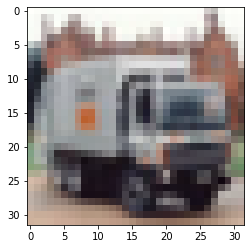

label dog


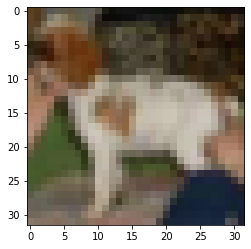

label horse


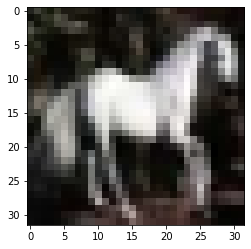

label truck


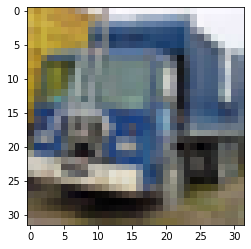

label ship


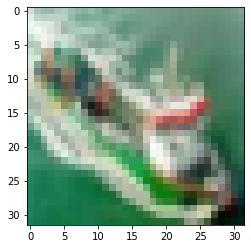

label dog


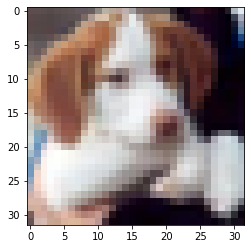

label horse


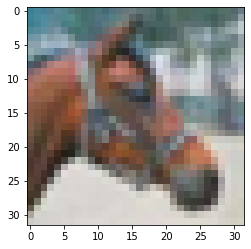

label ship


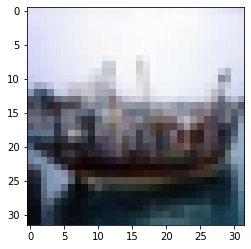

label frog


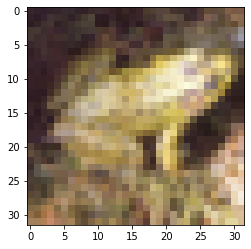

label horse


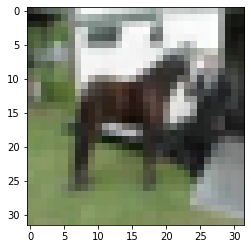

In [20]:
print(val_img[i])
for i in range(11,21):
    plt.imshow(val_img[i])
    print("label", CATEGORYS[np.argmax(val_label[i])])
    plt.show()

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense,MaxPool2D
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(6, (5,5), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(Conv2D(16, (5,5), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(120))
model.add(Activation('relu'))
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(),metrics=['accuracy'])
input_shape = train_img[0].shape
print(input_shape)
# model.summary()
history = model.fit(train_img, train_label, batch_size=16, epochs=150,verbose=1,validation_data=(val_img,val_label))




(32, 32, 3)
Epoch 1/150
3125/3125 [==============================] - 9s 3ms/step - loss: 1.8985 - accuracy: 0.3116 - val_loss: 1.6352 - val_accuracy: 0.4163
Epoch 2/150
3125/3125 [==============================] - 9s 3ms/step - loss: 1.5459 - accuracy: 0.4452 - val_loss: 1.4632 - val_accuracy: 0.4691
Epoch 3/150
3125/3125 [==============================] - 9s 3ms/step - loss: 1.4384 - accuracy: 0.4868 - val_loss: 1.3969 - val_accuracy: 0.5010
Epoch 4/150
3125/3125 [==============================] - 9s 3ms/step - loss: 1.3638 - accuracy: 0.5146 - val_loss: 1.3908 - val_accuracy: 0.5020
Epoch 5/150
3125/3125 [==============================] - 9s 3ms/step - loss: 1.3049 - accuracy: 0.5382 - val_loss: 1.3176 - val_accuracy: 0.5285
Epoch 6/150
3125/3125 [==============================] - 9s 3ms/step - loss: 1.2535 - accuracy: 0.5542 - val_loss: 1.3116 - val_accuracy: 0.5384
Epoch 7/150
3125/3125 [==============================] - 9s 3ms/step - loss: 1.2109 - accuracy: 0.5697 - val_loss: 1.2

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (16, 28, 28, 6)           456       
_________________________________________________________________
activation_10 (Activation)   (16, 28, 28, 6)           0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (16, 14, 14, 6)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (16, 10, 10, 16)          2416      
_________________________________________________________________
activation_11 (Activation)   (16, 10, 10, 16)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (16, 5, 5, 16)            0         
_________________________________________________________________
flatten_2 (Flatten)          (16, 400)                

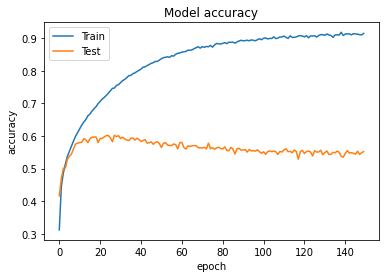

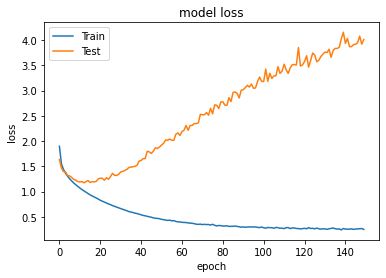

In [24]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
